___
# Ciência dos Dados - PROJETO 1

## Alexandre Almeida Edington

## Análise da evolução do nível médio de ensino dos brasileiros separado por região do país

___
## Introdução

Este projeto pretente analisar o nível médio de ensino de brasileiros em diferentes idades, a fim de interpretar um avanço ou regressão na escolaridade ao longo do últimio século. Para que o projeto fique m, cada região do país terá sua própria análise e conclusão.

___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Alexandre\Desktop\semestre3\Dados\Projeto1


In [3]:
pnad=pd.read_csv('PES2011csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
#colunas que serão usadas:
#V8005 - idade
#V5030 - região
#V6007 - ensino
#V0601 - analfabetismo
#V0609 - teste_ensino

In [5]:
df=pnad[["V8005","V0302","V5030","V6007","V0601","V0609"]]
df["IDADE"]=df["V8005"]
df["REGIAO"]=df["V5030"]
df["ENSINO"]=df["V6007"]
df["ANALFABETISMO"]=df["V0601"]
df["TESTE"]=df["V0609"]
del df["V8005"]
del df["V5030"]
del df["V6007"]
del df["V0601"]
del df["V0609"]
df=df.reset_index()
del df["index"]
#df=df.loc[0:99999]

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Nessa parte, estamos adicionando a categoria "analfabeto" como uma das possibilidades de nível de ensino. Além disso, estamos usando a coluna "TESTE" para verificar se cada indivíduo completou pelo menos um ano do curso mais avançado que afirmou ter feito.

In [6]:
for x in range(len(df.IDADE)):
    i=df.ANALFABETISMO[x]
    if i == 3:
        j = 14
        df.ENSINO[x]=j
    else:
        j = df.TESTE[x]
        if j == 3:
            j = df.ENSINO[x]-1
            df.ENSINO[x]=j
            
del df["ANALFABETISMO"]
del df["TESTE"]
df=df.dropna(how="any")

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Aqui, estamos agrupando as pessoas em grupos por idade. Por exemplo, indivíduos de 90 a 99 anos serão agrupados como "90". Nesse setor também desconsideramos pessoas com mais de 99 anos ou menos de 30. Isso acontece para termos um estudo mais preciso, e para que as pessoas estudadas tenham tempo suficiente para chegarem aos níveis superiores de ensino.


In [7]:
df=df.reset_index()
del df["index"]

for x in range(len(df.IDADE)):
    i=df.IDADE[x]
    if i < 30:
        i = np.nan
    elif i > 99:
        i = np.nan
    elif i > 89:
        i = 90
    elif i > 79:
        i = 80
    elif i > 69:
        i = 70
    elif i > 59:
        i = 60
    elif i > 49:
        i = 50
    elif i > 39:
        i = 40
    elif i > 29:
        i = 30   
    df.IDADE[x]=i
    
df=df.dropna(how="any")

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Alexandre\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
#Separando as pessoas por região do país.

norte=[11,12,13,14,15,16,17]
nordeste=[21,22,23,24,25,26,27,28,29]
sudeste=[31,32,33,34,35]
sul=[41,42,43]
centrooeste=[51,52,53]

df=df.reset_index()
del df["index"]

for x in range(len(df.REGIAO)):
    i=df.REGIAO[x]
    if i in norte:
        i = "Norte"
    elif i in nordeste:
        i = "Nordeste"
    elif i in sudeste:
        i = "Sudeste"
    elif i in sul:
        i = "Sul"
    elif i in centrooeste:
        i = "Centro Oeste"
    else:
        i = np.nan
    df.REGIAO[x]=i
    
df=df.dropna(how="any")

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Alexandre\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
#Transformando níveis de ensino em categorias.

primario=[1,10,11,12,13]
fundamental=[4,6]
colegial=[2,3,5,7]
superior=[8,9]
analfabeto=[14]

df=df.reset_index()
del df["index"]

for x in range(len(df.ENSINO)):
    i=df.ENSINO[x]
    if i in primario:
        i = 2
    elif i in fundamental:
        i = 3
    elif i in colegial:
        i = 4
    elif i in superior:
        i = 5
    elif i in analfabeto:
        i = 1
    else:
        i = np.nan
    df.ENSINO[x]=i
    
df=df.dropna(how="any")
df.ENSINO = df.ENSINO.astype("category")
df.ENSINO.cat.categories=(["Analfabeto","Primario","Fundamental","Colegial","Superior"])
df=df.reset_index()
del df["index"]

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


___
## Análise e Resultados

In [10]:
ctgeral=pd.crosstab(df.IDADE,df.ENSINO).apply(lambda r: r/r.sum(), axis=1)
ctgeral

#As crosstabs e os gráficos estarão em porcentagem para que a maior quantidade de pessoas mais jovens no país não interfira
#com a pesquisa e com os resultados.

ENSINO,Analfabeto,Primario,Fundamental,Colegial,Superior
IDADE,,,,,
30.0,0.048467,0.002757,0.390816,0.407891,0.150069
40.0,0.081302,0.084298,0.344628,0.339153,0.150620
50.0,0.126579,0.293707,0.136446,0.318012,0.125256
60.0,0.236924,0.354656,0.066156,0.244760,0.097503
70.0,0.340501,0.384914,0.036306,0.173070,0.065210
80.0,0.426441,0.349901,0.023857,0.152087,0.047714
90.0,0.540373,0.322981,0.012422,0.093168,0.031056


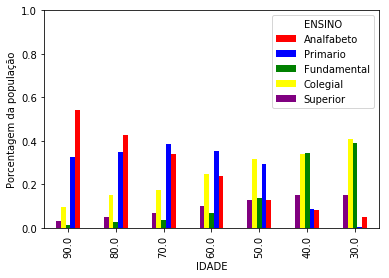

In [11]:
ctgeral.plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()

Analisando esse gráfico, a diminuição no analfabetismo e o aumento dos ensinos fundamental e colegial mostram que nos 60 anos presentes nessa pesquisa a escolaridade média no país melhorou muito. Entretanto, não podemos assumir que como houve uma melhora geral, cada região teve uma melhora equivalente. Portanto, agora faremos as mesmas análises para cada região do Brasil.

## Norte

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,0.98,'Análise da Região Norte')

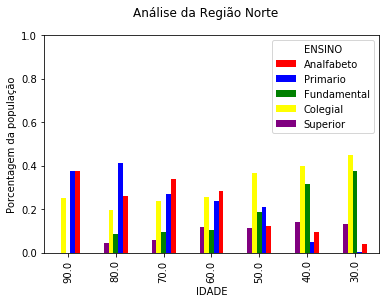

In [12]:
dftemp=df[["IDADE","REGIAO","ENSINO"]]
for x in range(len(dftemp.REGIAO)):
    i=dftemp.REGIAO[x]
    if not i == "Norte":
        i=np.nan
    dftemp.REGIAO[x]=i

dftemp=dftemp.dropna(how="any")
ctnorte=pd.crosstab(dftemp.IDADE,dftemp.ENSINO).apply(lambda r: r/r.sum(), axis=1)
ctnorte.plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Norte')

## Nordeste

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,0.98,'Análise da Região Nordeste')

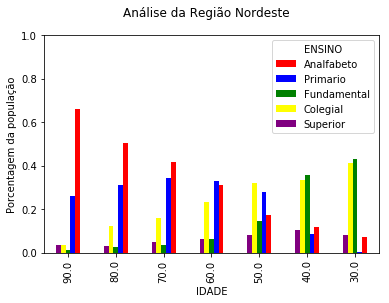

In [13]:
dftemp=df[["IDADE","REGIAO","ENSINO"]]
for x in range(len(dftemp.REGIAO)):
    i=dftemp.REGIAO[x]
    if not i == "Nordeste":
        i=np.nan
    dftemp.REGIAO[x]=i

dftemp=dftemp.dropna(how="any")
ctnordeste=pd.crosstab(dftemp.IDADE,dftemp.ENSINO).apply(lambda r: r/r.sum(), axis=1)
ctnordeste.plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Nordeste')

## Centro-Oeste

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,0.98,'Análise da Região Centro-Oeste')

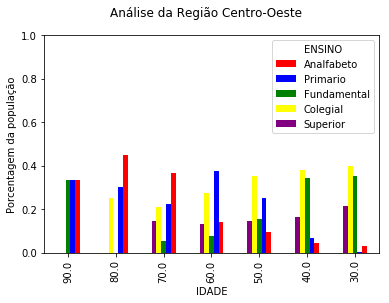

In [14]:
dftemp=df[["IDADE","REGIAO","ENSINO"]]
for x in range(len(dftemp.REGIAO)):
    i=dftemp.REGIAO[x]
    if not i == "Centro Oeste":
        i=np.nan
    dftemp.REGIAO[x]=i

dftemp=dftemp.dropna(how="any")
ctoeste=pd.crosstab(dftemp.IDADE,dftemp.ENSINO).apply(lambda r: r/r.sum(), axis=1)
ctoeste.plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Centro-Oeste')

## Sudeste

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,0.98,'Análise da Região Sudeste')

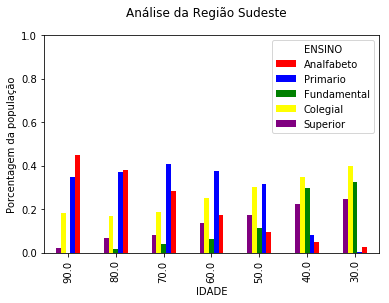

In [15]:
dftemp=df[["IDADE","REGIAO","ENSINO"]]
for x in range(len(dftemp.REGIAO)):
    i=dftemp.REGIAO[x]
    if not i == "Sudeste":
        i=np.nan
    dftemp.REGIAO[x]=i

dftemp=dftemp.dropna(how="any")
ctsudeste=pd.crosstab(dftemp.IDADE,dftemp.ENSINO).apply(lambda r: r/r.sum(), axis=1)
ctsudeste.plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Sudeste')

## Sul

C:\Users\Alexandre\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexandre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,0.98,'Análise da Região Sul')

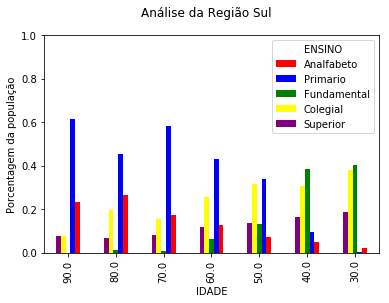

In [16]:
dftemp=df[["IDADE","REGIAO","ENSINO"]]
for x in range(len(dftemp.REGIAO)):
    i=dftemp.REGIAO[x]
    if not i == "Sul":
        i=np.nan
    dftemp.REGIAO[x]=i

dftemp=dftemp.dropna(how="any")
ctsul=pd.crosstab(dftemp.IDADE,dftemp.ENSINO).apply(lambda r: r/r.sum(), axis=1)
ctsul.plot(kind='bar', color=("red","blue","green","yellow","Purple"))
plt.ylim((0,1))
plt.ylabel("Porcentagem da população")
plt.gca().invert_xaxis()
plt.suptitle('Análise da Região Sul')

___
## Conclusão 

Descreva aqui suas conclusões!

In [ ]:
#comeco 9:11